In [2]:
import numpy as np

from l5kit.configs import load_config_data
from l5kit.data import LocalDataManager, ChunkedDataset
from l5kit.dataset import AgentDataset
from l5kit.rasterization import build_rasterizer

from tqdm import tqdm
import matplotlib.pyplot as plt
import os

In [3]:
os.environ['L5KIT_DATA_FOLDER'] = '../../dataset'
dm = LocalDataManager(None)

cfg = load_config_data('./config.yaml')
print(cfg)

{'format_version': 4, 'model_params': {'model_architecture': 'resnet50', 'history_num_frames': 0, 'history_step_size': 1, 'history_delta_time': 0.1, 'future_num_frames': 50, 'future_step_size': 1, 'future_delta_time': 0.1}, 'raster_params': {'raster_size': [224, 224], 'pixel_size': [0.5, 0.5], 'ego_center': [0.25, 0.5], 'map_type': 'py_semantic', 'satellite_map_key': 'aerial_map/aerial_map.png', 'semantic_map_key': 'semantic_map/semantic_map.pb', 'dataset_meta_key': 'meta.json', 'filter_agents_threshold': 0.5, 'disable_traffic_light_faces': False}, 'train_data_loader': {'key': 'scenes/sample.zarr', 'batch_size': 12, 'shuffle': True, 'num_workers': 16}, 'val_data_loader': {'key': 'scenes/sample.zarr', 'batch_size': 12, 'shuffle': False, 'num_workers': 16}, 'train_params': {'checkpoint_every_n_steps': 10000, 'max_num_steps': 5, 'eval_every_n_steps': 10000}}


In [4]:
train_cfg = cfg['train_data_loader']
rasterizer = build_rasterizer(cfg, dm)
train_zarr = ChunkedDataset(dm.require(train_cfg['key'])).open()

In [5]:
scenes = train_zarr.scenes
frames = train_zarr.frames
agents = train_zarr.agents

In [224]:
scene = scenes[0]
x = np.zeros((4,1000))
y = np.zeros((4,1000))
for i in tqdm(range(scene[0][0],scene[0][1])):
    frame = frames[i]
    x[i][0] = frame[3][0]
    y[i][0] = frame[3][1]
    for j in range(frame[1][0],frame[1][1]):
        agent = agents[j]
        x[i][j] = agent[0][0]
        y[i][j] = agent[0][1]
        print(np.concatenate([agent[0],agent[3],[agent[2]]]))
    if i == 3:
        break

  0%|                                                  | 0/248 [00:00<?, ?it/s]

[ 6.65034241e+02 -2.20751221e+03  0.00000000e+00  0.00000000e+00
  1.01667511e+00]
[ 7.17661255e+02 -2.17376001e+03  0.00000000e+00  0.00000000e+00
 -7.83223987e-01]
[ 7.30681396e+02 -2.18067896e+03  0.00000000e+00  0.00000000e+00
 -3.21747005e-01]
[ 6.71253601e+02 -2.20474536e+03  0.00000000e+00  0.00000000e+00
  7.85500944e-01]
[ 6.69776306e+02 -2.21300464e+03  0.00000000e+00  0.00000000e+00
  1.49235928e+00]
[ 6.72436829e+02 -2.20317310e+03  0.00000000e+00  0.00000000e+00
  1.09966016e+00]
[ 6.73497009e+02 -2.20222412e+03  0.00000000e+00  0.00000000e+00
  7.06961155e-01]
[ 6.74934570e+02 -2.19954907e+03  0.00000000e+00  0.00000000e+00
  7.85500944e-01]
[ 6.76894043e+02 -2.19582983e+03  0.00000000e+00  0.00000000e+00
  9.42580581e-01]
[ 6.80792969e+02 -2.19676001e+03  0.00000000e+00  0.00000000e+00
  7.85500944e-01]
[ 6.81160950e+02 -2.19037305e+03  0.00000000e+00  0.00000000e+00
  1.02787657e-04]
[ 6.86068909e+02 -2.18283545e+03  0.00000000e+00  0.00000000e+00
  1.57182425e-01]
[ 7.

  0%|▏                                         | 1/248 [00:00<02:32,  1.61it/s]

[ 6.65342224e+02 -2.18562500e+03  0.00000000e+00  0.00000000e+00
  1.02787657e-04]
[ 6.65206726e+02 -2.18931250e+03  0.00000000e+00  0.00000000e+00
  1.41381943e+00]
[ 6.59792603e+02 -2.19446484e+03  0.00000000e+00  0.00000000e+00
  1.17820001e+00]
[ 6.53352356e+02 -2.20055225e+03  0.00000000e+00  0.00000000e+00
  3.92801881e-01]
[ 6.50314636e+02 -2.20477124e+03  0.00000000e+00  0.00000000e+00
  1.02112043e+00]
[ 6.52240845e+02 -2.20357812e+03  0.00000000e+00  0.00000000e+00
  8.64040792e-01]
[ 6.51329224e+02 -2.20823950e+03  0.00000000e+00  0.00000000e+00
  9.42580581e-01]
[ 6.66996460e+02 -2.20495605e+03  0.00000000e+00  0.00000000e+00
  9.86888647e-01]
[ 7.17612366e+02 -2.17477197e+03  0.00000000e+00  0.00000000e+00
 -7.86870778e-01]
[ 7.30951904e+02 -2.18078564e+03  7.31845856e-01 -2.17139363e-01
 -3.21749777e-01]
[ 6.71245422e+02 -2.20473999e+03  0.00000000e+00  0.00000000e+00
  7.85521984e-01]
[ 6.69768311e+02 -2.21299951e+03  0.00000000e+00  0.00000000e+00
  1.49238026e+00]
[ 6.

  1%|▎                                         | 2/248 [00:01<02:29,  1.64it/s]

[ 6.50306458e+02 -2.20476636e+03  0.00000000e+00  0.00000000e+00
  1.02114141e+00]
[ 6.52232605e+02 -2.20357324e+03  0.00000000e+00  0.00000000e+00
  8.64061773e-01]
[ 6.51289551e+02 -2.20820557e+03 -3.00334066e-01  2.76749045e-01
  1.20082581e+00]
[ 6.82873901e+02 -2.18756421e+03  0.00000000e+00  0.00000000e+00
  7.85521984e-01]
[ 7.12124878e+02 -2.17287769e+03  0.00000000e+00  0.00000000e+00
  1.02114141e+00]
[ 7.11772705e+02 -2.15066919e+03 -1.23319831e-02 -7.79235139e-02
  1.41384053e+00]
[ 7.08401978e+02 -2.15278491e+03  0.00000000e+00  0.00000000e+00
  1.09968126e+00]
[ 7.08872375e+02 -2.15219775e+03  0.00000000e+00  0.00000000e+00
  1.57203436e-01]
[ 6.71257202e+02 -2.17403027e+03  0.00000000e+00  0.00000000e+00
  4.71362710e-01]
[ 6.70792664e+02 -2.17779663e+03  0.00000000e+00  0.00000000e+00
  1.25676084e+00]
[ 6.69330505e+02 -2.18326074e+03  0.00000000e+00  0.00000000e+00
  1.25676084e+00]
[ 6.61773376e+02 -2.18863062e+03  0.00000000e+00  0.00000000e+00
  7.06982136e-01]
[ 6.

  1%|▌                                         | 3/248 [00:01<02:40,  1.53it/s]


[ 6.84806396e+02 -2.18420337e+03  0.00000000e+00  0.00000000e+00
  2.35764608e-01]
[ 7.04715454e+02 -2.16894092e+03  0.00000000e+00  0.00000000e+00
  1.02116275e+00]
[ 7.04221008e+02 -2.16689819e+03  0.00000000e+00  0.00000000e+00
  3.92844230e-01]
[ 7.04348145e+02 -2.15893286e+03  0.00000000e+00  0.00000000e+00
  9.42622960e-01]
[ 7.02061584e+02 -2.16609766e+03  0.00000000e+00  0.00000000e+00
  9.42622960e-01]
[ 6.86164734e+02 -2.15022778e+03  0.00000000e+00  0.00000000e+00
  3.14304411e-01]
[ 6.84761780e+02 -2.15907935e+03  0.00000000e+00  0.00000000e+00
  7.86849707e-02]
[ 6.67294739e+02 -2.20442432e+03  1.01263988e+00  1.74916482e+00
  9.99890804e-01]
[ 7.17618469e+02 -2.17476367e+03  0.00000000e+00  0.00000000e+00
 -7.86856472e-01]
[ 7.31221680e+02 -2.18089722e+03  1.26788095e-01 -2.98424870e-01
 -3.12421292e-01]
[ 6.74824829e+02 -2.19946777e+03 -2.58048296e-01  1.84340179e-01
  6.02910697e-01]
[ 6.76903992e+02 -2.19583521e+03  3.19998488e-02 -2.82363873e-02
  8.81265104e-01]
[ 6

  1%|▌                                         | 3/248 [00:02<03:47,  1.07it/s]

[ 6.85513367e+02 -2.15869189e+03  0.00000000e+00  0.00000000e+00
  1.25677514e+00]
[ 6.83110291e+02 -2.15581885e+03  0.00000000e+00  0.00000000e+00
  5.49916804e-01]


In [106]:
frames = zarr_dataset.frames
coords = np.zeros((len(frames), 2))
for idx_coord, idx_data in enumerate(tqdm(range(len(frames)), desc="getting centroid to plot trajectory")):
    frame = zarr_dataset.frames[idx_data]
    coords[idx_coord] = frame['ego_translation'][:2]

plt.scatter(coords[:, 0], coords[:, 1], marker='.')
axes = plt.gca()
axes.set_xlim([-2500, 1600])
axes.set_ylim([-2500, 1600])

NameError: name 'zarr_dataset' is not defined

In [6]:
def getTrajectories(scene,frames):
    coords = np.zeros((2000,scene[0][1]-scene[0][0],2))
    for frame_counter,frame_num in enumerate(tqdm(range(scene[0][0],scene[0][1]))):
        frame = frames[frame_num]
        coords[0][frame_counter] = frame[3][:2]
        for j in range(frame[1][0],frame[1][1]):
            agent = agents[j]
            coords[agent[-2]][frame_counter] = agent[0]
    return coords

In [70]:
coords = getTrajectories(scenes[0],frames)

100%|████████████████████████████████████████| 248/248 [01:37<00:00,  2.55it/s]


In [7]:
def getWithout(arr,n):
    return arr[arr!=n]

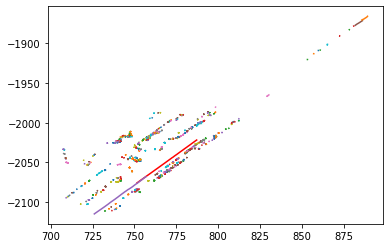

In [119]:
ax = plt.gca()

ax.set_autoscale_on(True)
ax.plot(coords[0,100:150,0], coords[0,100:150, 1],color = 'red')
for j in range(1,2000):
    #if (coords[j,:99,0]!=0).sum()>50:
    plt.plot(getWithout(coords[j,100:150,0],0),getWithout(coords[j,100:150,1],0))

plt.show()


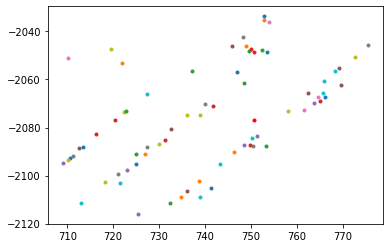

In [123]:
ax = plt.gca()

ax.set_autoscale_on(True)
ax.plot(coords[0,99,0], coords[0,99, 1],color = 'red',marker = '.')
for j in range(1,2000):
    #if (coords[j,:99,0]!=0).sum()>50:
    plt.plot(getWithout(coords[j,99,0],0),getWithout(coords[j,99,1],0),marker = '.')

plt.show()


In [8]:
def getVelocity(scene,frames):
    coords = -1 * np.ones((2000,scene[0][1]-scene[0][0],2))
    for i in tqdm(range(scene[0][0],scene[0][1])):
        frame = frames[i]
        for j in range(frame[1][0],frame[1][1]):
            agent = agents[j]
            coords[agent[-2]][i-scene[0][0]] = agent[3]
    return coords

100%|████████████████████████████████████████| 249/249 [02:08<00:00,  1.93it/s]


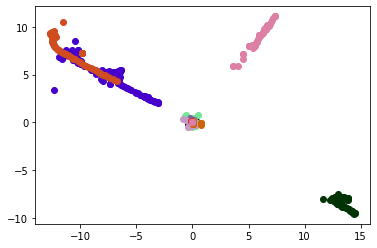

In [10]:
vels = getVelocity(scenes[1],frames)
graphVelocity(vels)

In [12]:
agents[0]

([  665.03424072, -2207.51220703], [4.3913283, 1.8138304, 1.5909758], 1.0166751, [0., 0.], 1, [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [54]:
from ripser import ripser
from persim import plot_diagrams

In [57]:
def getProfile(agent_num,vels):
    vel = vels[agent_num]
    
    X = np.zeros((len(getWithout(vel[:,0],-1)),2))
    X[:,0] = (np.arange(len(vel[:,0]))[vel[:,0]!=-1])
    X[:,1] = (getWithout(vel[:,0],-1)**2 + getWithout(vel[:,1],-1)**2)**0.5
    
    dgms = ripser(X)['dgms']

    plt.figure(figsize=(8, 4))
    plt.subplot(121)
    plt.scatter((np.arange(len(vel[:,0]))[vel[:,0]!=-1]),(getWithout(vel[:,0],-1)**2 + getWithout(vel[:,1],-1)**2)**0.5)

    plt.title("Point Cloud")
    plt.subplot(122)
    plot_diagrams(dgms)
    plt.show()
    return X

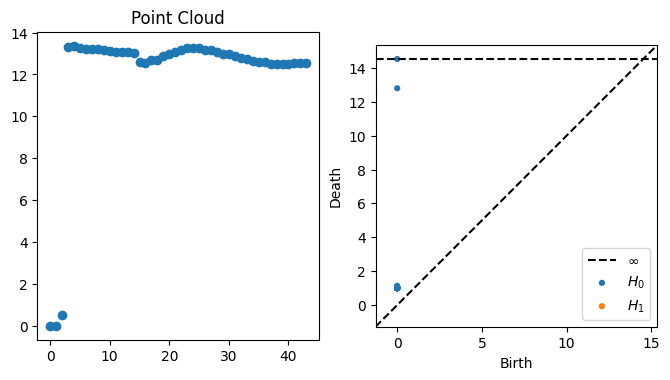

In [59]:
X = getProfile(1,vels)

In [9]:
def graphVelocity(coords):
    fig,ax = plt.subplots()
    for j in range(1,2000):
        if (coords[j,:,0]!=-1).sum() > 50:
            ax.scatter(coords[j,:,0][coords[j,:,0]!=-1],coords[j,:,1][coords[j,:,1]!=-1],color = ((j%1000)/1000.0,(j%10)/10.0,(j%100)/100.0),label = j)

    #ax.legend()
    plt.show()

In [6]:
def distance_from_center(agent1, agent2):
    '''
    Calculates the distance between the centroids of two agents
    @param agent1 - AgentDataset dictionary that represents first agent
    @param agent2 - AgentDataset dictionary that represents second agent
    @return - numpy float distance between the two agents' centroids
    '''
    return np.linalg.norm(agent1['centroid'] - agent2['centroid'])

In [7]:
def distance_from_edge(agent1, agent2):
    '''
    Calculates the distance between the closest edges of two agents
    @param agent1 - AgentDataset dictionary that represents first agent
    @param agent2 - AgentDataset dictionary that represents second agent
    @return - numpy float distance between two agents' closest edges
    '''
    
    projection = lambda u, v: (np.dot(u, v) / np.dot(v, v)) * v
    
    # generate orthogonal axes for each agent
    a1_length_axis = agent1['extent'][1] / 2 * np.array([np.cos(agent1['yaw']), np.sin(agent1['yaw'])])
    a1_width_axis  = agent1['extent'][0] / 2 * np.array([np.sin(agent1['yaw']), np.cos(agent1['yaw'])])
    a2_length_axis = agent2['extent'][1] / 2 * np.array([np.cos(agent2['yaw']), np.sin(agent2['yaw'])])
    a2_width_axis  = agent2['extent'][0] / 2 * np.array([np.sin(agent2['yaw']), np.cos(agent2['yaw'])])
        
    # find all of the corners
    a1_corners = np.asarray([agent1['centroid'] + a1_length_axis * a + a1_width_axis * a for a in [-1, 1]])
    a2_corners = np.asarray([agent2['centroid'] + a2_length_axis * a + a2_width_axis * a for a in [-1, 1]])
    
    # convert corners into cartesian intervals
    a1_max = np.maximum(*a1_corners)
    a1_min = np.minimum(*a1_corners)
    a2_max = np.maximum(*a2_corners)
    a2_min = np.minimum(*a2_corners)
    
    # compute minkowski distance for rectangles
    y = np.maximum(0, np.maximum(a1_min - a2_max, a2_min - a1_max))
    
    return np.sum(np.abs(y) ** 2, axis=-1) ** (1/2)

In [8]:
distance_from_center(dataset[1], dataset[5])

88.71618250270556

In [9]:
distance_from_edge(dataset[1], dataset[5])

85.06367486122527